<a href="https://colab.research.google.com/github/nandinib1999/viral-news-predictor/blob/master/Viral_News_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Viral News Predictor**

Out of the two tasks, I will be doing the Viral News Predictor Task. For training the model, I will be using the dataset from Kaggle. With the trained model, I will check whether the web crawled news is viral/fake or not.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
true_df = pd.read_csv("/content/True.csv")
fake_df = pd.read_csv("/content/Fake.csv")

In [3]:
true_df['class'] = 1
true_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [4]:
fake_df['class'] = 0
fake_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [0]:
data = pd.concat([fake_df, true_df]).sample(frac=1)

In [14]:
data.head()

,title,text,subject,date,class
495,"Factbox: Trump on Twitter (Nov. 28) - NFL, Fir...",The following statements were posted to the ve...,politicsNews,"November 28, 2017",1
17303,(VIDEO) REMEMBER THE “OBAMAPHONE”? GET READY T...,This is just more government waste and expansi...,Government News,"May 29, 2015",0
1488,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 12, 2017",0
14954,"LEFTIST Resentment Peddler, Larry David (Net W...",And why wouldn t he? The leftist comedy writer...,politics,"Nov 8, 2015",0
8261,Obama may speak informally with Duterte in Lao...,VIENTIANE (Reuters) - U.S. President Barack Ob...,politicsNews,"September 6, 2016",1


In [7]:
data.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

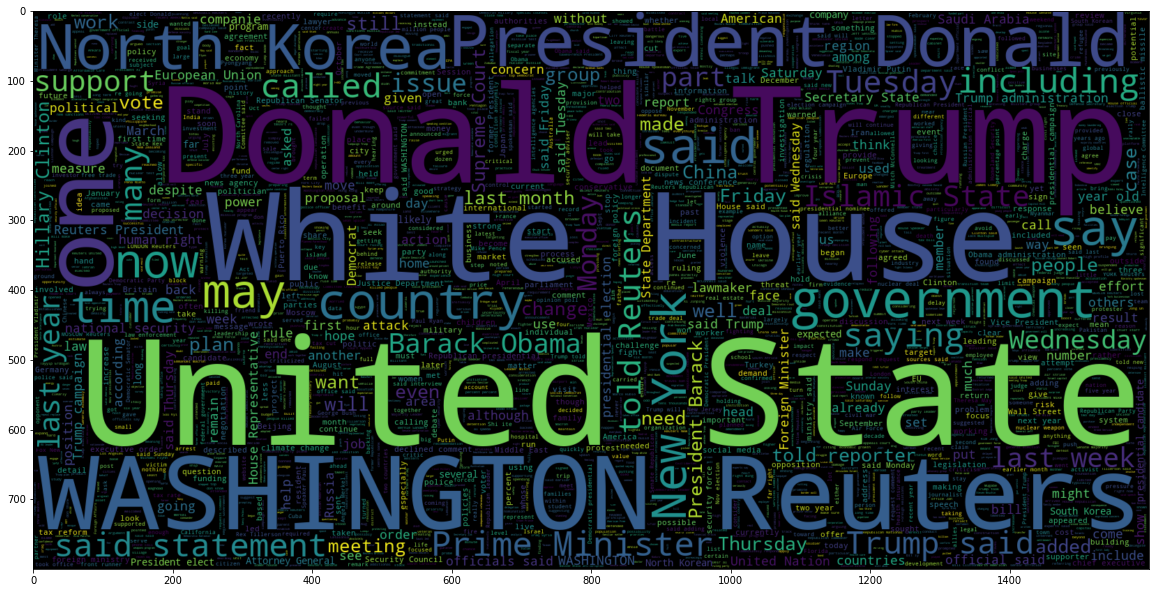

In [8]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(true_df.text))
plt.imshow(wc , interpolation = 'bilinear')

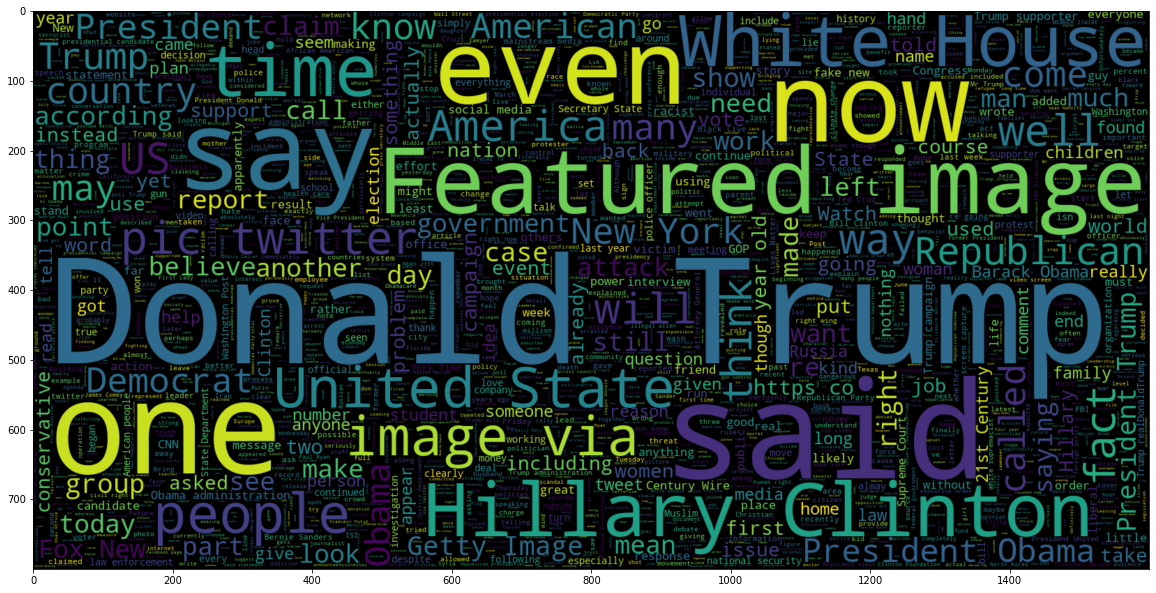

In [9]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(fake_df.text))
plt.imshow(wc , interpolation = 'bilinear')

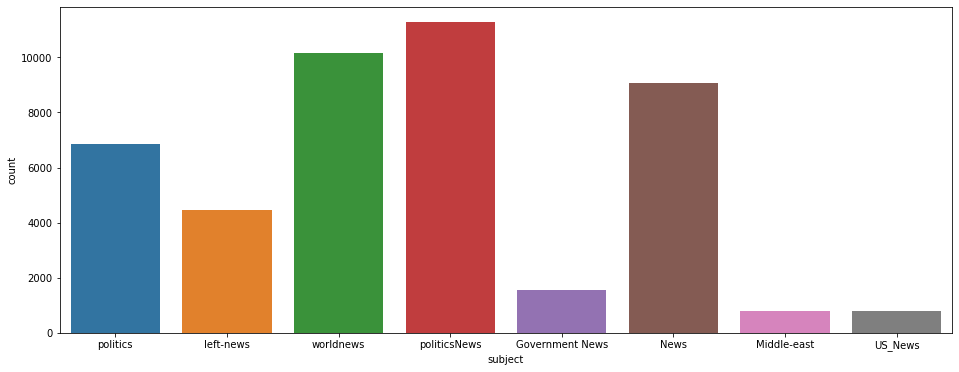

In [10]:
plt.figure(figsize=(16, 6))
sns.countplot(x="subject", data=data)

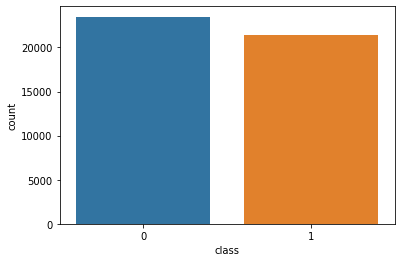

In [11]:
sns.countplot(x="class", data=data)

In [15]:
data['text'] = data['text']+" "+data['title']+" "+data['subject']
data['text']

495      The following statements were posted to the ve...
17303    This is just more government waste and expansi...
1488     Siding with Trump s Attorney General Jeff Sess...
14954    And why wouldn t he? The leftist comedy writer...
8261     VIENTIANE (Reuters) - U.S. President Barack Ob...
                               ...                        
6291     It s become quite clear that as much as Fox Ne...
11221    CHARLESTON, S.C./WASHINGTON (Reuters) - Republ...
15971    LONDON (Reuters) - Damian Green, number two in...
15888    HONG KONG (Reuters) - Hong Kong will try to en...
15843    BAGHDAD (Reuters) - Iraq s Kurdish region said...
Name: text, Length: 44898, dtype: object

Text Preprocessing

In [0]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer

import re
import string

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
STOP_WORDS = set(stopwords.words('english'))
punct = list(punctuation)
stemmer = PorterStemmer()

In [0]:
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in STOP_WORDS and i.strip().lower() not in punct:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)

In [0]:
data.text = data.text.apply(stem_text)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data.text,data['class'])

## Implementation One - Sequential Model using Keras 

With three hidden dense layers and activation function as relu, this is a simple model for classifying news articles as fake and real.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (33673, 1948178)
BOW_cv_test: (11225, 1948178)


In [21]:
from keras.models import Sequential, load_model
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

Using TensorFlow backend.


In [0]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [23]:
model.fit(cv_train_reviews,y_train , epochs = 5)

Epoch 1/5
33673/33673 [==============================] - 615s 18ms/step - loss: 0.6914 - accuracy: 0.5225
Epoch 2/5
33673/33673 [==============================] - 612s 18ms/step - loss: 0.0836 - accuracy: 0.9764
Epoch 3/5
33673/33673 [==============================] - 611s 18ms/step - loss: 0.0425 - accuracy: 0.9887
Epoch 4/5
33673/33673 [==============================] - 612s 18ms/step - loss: 0.0418 - accuracy: 0.9887
Epoch 5/5
33673/33673 [==============================] - 611s 18ms/step - loss: 0.0421 - accuracy: 0.9887


In [0]:
model.save('model.h5')

In [0]:
pred = model.predict(cv_test_reviews)

In [0]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.899510022271715

In [0]:
def preprocess_data(data):
  data.text = data.title + ' ' + data.text
  data.text = data.text.apply(stem_text)
  return data

In [0]:
def threshold_classes(scrape_pred):
  for i in range(len(scrape_pred)):
      if(scrape_pred[i] > 0.5):
          scrape_pred[i] = 1
      else:
          scrape_pred[i] = 0
  return scrape_pred

In [0]:
def test_on_custom_data(data):
  cv_text = cv.transform(data)
  preds = model.predict(cv_text)
  preds = threshold_classes(preds)
  return preds

In [58]:
test_data = pd.read_csv('/content/scraped_news_real.csv')
test_data.head()

,title,text
0,New York Board of Elections Cancels Democratic...,New York officials canceled the state’s Democr...
1,Nancy Pelosi Endorses Joe Biden,"Nancy Pelosi, the speaker of the House, endors..."
2,On Politics: Rattling Money Out of Congress’s ...,"Good morning and welcome to On Politics, a dai..."
3,A Survey of Essential Workers Shows a Politica...,Democrats and Republicans differ on attitudes ...
4,Michigan Senator Apologizes for Mask That Look...,A Republican state senator in Michigan apologi...


In [59]:
test_data = preprocess_data(test_data)
test_data.head()

,title,text
0,New York Board of Elections Cancels Democratic...,new york board elect cancel democrat president...
1,Nancy Pelosi Endorses Joe Biden,"nanci pelosi endors joe biden nanci pelosi, sp..."
2,On Politics: Rattling Money Out of Congress’s ...,politics: rattl money congress’ piggi bank goo...
3,A Survey of Essential Workers Shows a Politica...,survey essenti worker show polit divid democra...
4,Michigan Senator Apologizes for Mask That Look...,michigan senat apolog mask look like confeder ...


In [0]:
preds = test_on_custom_data(test_data.text)

In [65]:
test_data['prediction'] = preds
test_data.head()

,title,text,prediction
0,New York Board of Elections Cancels Democratic...,new york board elect cancel democrat president...,1.0
1,Nancy Pelosi Endorses Joe Biden,"nanci pelosi endors joe biden nanci pelosi, sp...",0.0
2,On Politics: Rattling Money Out of Congress’s ...,politics: rattl money congress’ piggi bank goo...,1.0
3,A Survey of Essential Workers Shows a Politica...,survey essenti worker show polit divid democra...,1.0
4,Michigan Senator Apologizes for Mask That Look...,michigan senat apolog mask look like confeder ...,1.0


In [42]:
dff = pd.read_csv('/content/scrape_news.csv')
dff.head()

,title,text
0,US Doctors Are Pumping Men Full of FEMALE SEX...,Two hospitals in the US are now experimenting ...
1,#BidenIsOverParty: Tara Reade’s Neighbor Corro...,A woman has come forward and corroborated clai...
2,USA Will NOT Participate in W.H.O. Vaccine Pro...,The USA will not participate in a World Health...
3,Howard Stern: Trump Supporters Should Take Dis...,Sirius XM host Howard Stern has slammed Presid...
4,Pelosi Endorses Biden Despite Credible Sex Ass...,Nancy Pelosi has officially endorsed Joe Biden...


In [0]:
dff = preprocess_data(dff)
preds = test_on_custom_data(dff.text)

In [0]:
dff['prediction'] = preds
dff.to_csv('check.csv', index=False)

## Implementation Two - Using LSTM and Dropout

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K 
K.clear_session()

In [17]:
!pip install tensorflow==2.0
import tensorflow as tf
print(tf.__version__)

2.0.0


In [18]:
# Tokenize text

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
word_index = tokenizer.word_index
vocab_size=len(word_index)
print(vocab_size)

# Padding data

sequences = tokenizer.texts_to_sequences(data['text'])
padded = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

147710


In [0]:
split = 0.2
split_n = int(round(len(padded)*(1-split),0))

train_data = padded[:split_n]
train_labels = data['class'].values[:split_n]
test_data = padded[split_n:]
test_labels = data['class'].values[split_n:]

In [0]:
import numpy as np

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
print(len(coefs))

embeddings_matrix = np.zeros((vocab_size+1, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-04-28 18:14:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c1b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   158MB/s    in 2.1s    

2020-04-28 18:15:01 (158 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]

100


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         14771100  
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 20)          6800      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0

In [26]:
history = model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_data=[test_data, test_labels])

Train on 35918 samples, validate on 8980 samples
Epoch 1/5
35918/35918 [==============================] - 177s 5ms/sample - loss: 0.2668 - accuracy: 0.8740 - val_loss: 0.3257 - val_accuracy: 0.8509
Epoch 2/5
35918/35918 [==============================] - 170s 5ms/sample - loss: 0.0847 - accuracy: 0.9735 - val_loss: 0.0575 - val_accuracy: 0.9849
Epoch 3/5
35918/35918 [==============================] - 170s 5ms/sample - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0340 - val_accuracy: 0.9894
Epoch 4/5
35918/35918 [==============================] - 170s 5ms/sample - loss: 0.0608 - accuracy: 0.9825 - val_loss: 0.0323 - val_accuracy: 0.9902
Epoch 5/5
35918/35918 [==============================] - 170s 5ms/sample - loss: 0.0336 - accuracy: 0.9902 - val_loss: 0.0197 - val_accuracy: 0.9937


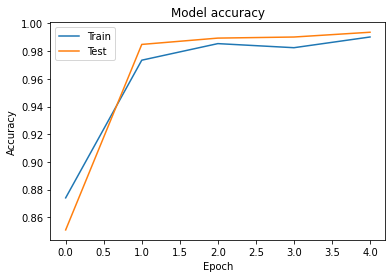

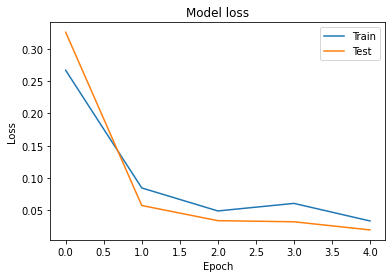

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
pred = model.predict(test_data)

In [0]:
pred = pred.round().astype(int)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,test_labels)

0.993652561247216

In [34]:
dff = pd.read_csv('/content/scraped_news_real.csv')
dff.head()

,title,text
0,New York Board of Elections Cancels Democratic...,New York officials canceled the state’s Democr...
1,Nancy Pelosi Endorses Joe Biden,"Nancy Pelosi, the speaker of the House, endors..."
2,On Politics: Rattling Money Out of Congress’s ...,"Good morning and welcome to On Politics, a dai..."
3,A Survey of Essential Workers Shows a Politica...,Democrats and Republicans differ on attitudes ...
4,Michigan Senator Apologizes for Mask That Look...,A Republican state senator in Michigan apologi...


In [0]:
dff.text = dff.title + ' ' + dff.text

In [0]:
sequences = tokenizer.texts_to_sequences(dff['text'])
padded = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

In [0]:
test_pred = model.predict(padded)

In [0]:
test_pred = test_pred.round().astype(int)